On travaille sur le matériau Na2O

In [1]:
from mp_api.client import MPRester
from pymatgen.phonon.plotter import PhononBSPlotter
import numpy as np
import matplotlib.pyplot as plt

mp_key = "bZpoHPJcxLjUBeUjBLrNEUZxmaqm9yiW"
mp_id = "mp-2352"

with MPRester(mp_key) as m:
    ph_bs = m.get_phonon_bandstructure_by_material_id(mp_id)

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

# Structure de bande de phonons et zone de Brillouin

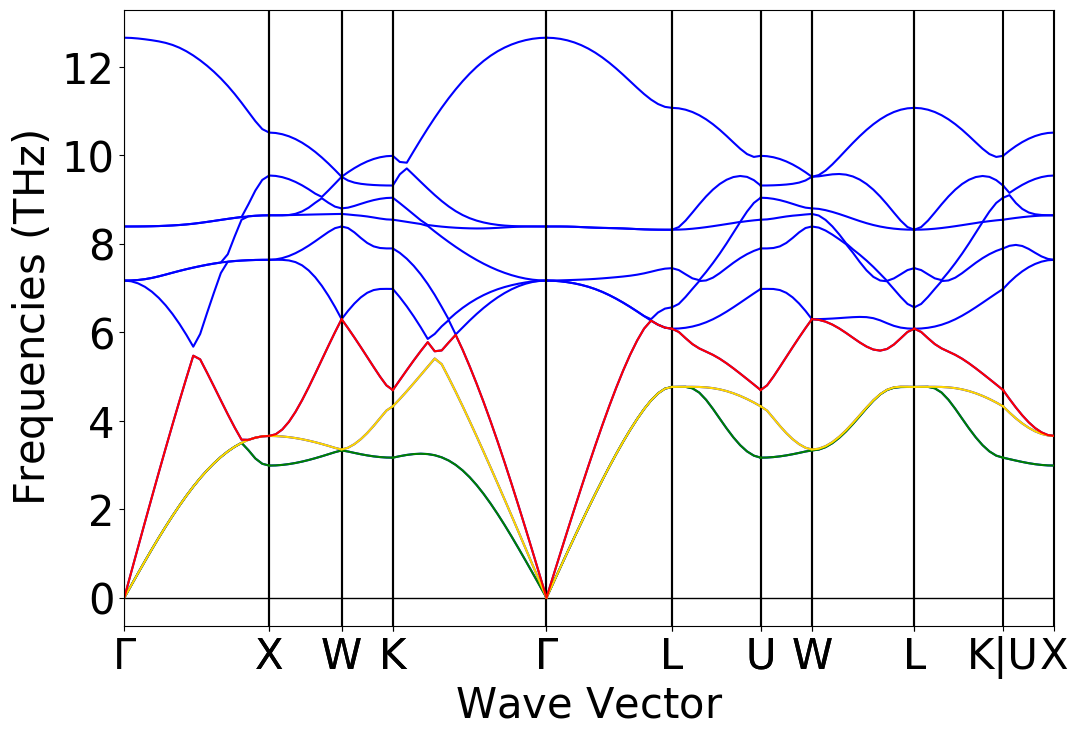

In [2]:
ph_bandstructure = PhononBSPlotter(ph_bs)
data_ph = ph_bandstructure.bs_plot_data()
distances = data_ph['distances']
frequency = data_ph['frequency']

ph_bandstructure_plot = ph_bandstructure.get_plot()

# Affichage de 3 branches acoustiques différentes.
for i in range(len(distances)):
    plt.plot(distances[i], frequency[i][0], color = 'green')
    plt.plot(distances[i], frequency[i][1], color = 'gold')
    plt.plot(distances[i], frequency[i][2], color = 'red')


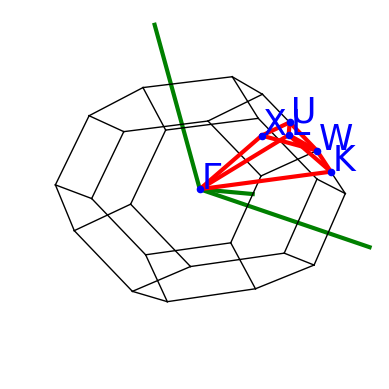

In [3]:
ph_bandstructure.plot_brillouin()

# Calcul de la vitesse du son 

Déjà, en se référant à la structure de bande des phonons, les 3 directions différentes de la zone de Brillouin que l'on va étudier sont : $\Gamma-X$, $K-\Gamma$ et $\Gamma-L$.

La vitesse du son est calculée comme étant la pente de la relation de dispersion $\frac{\partial\omega}{\partial\mathbf{q}}$ avec $\mathbf{q}$ notre vecteur d'onde et $\omega$ la fréquence angulaire (=$2\pi f$). 
Si on fait l'hypothèse d'une grande longeur d'onde (et donc d'une faible valeur de vecteur d'onde), cette relation est presque linéaire.

Pour caluler la vitesse du son pour les différentes branches acoustiques, il faut alors calculer la pente de la tangente à ces branches selon la direction choisi pour une fréquence nulle, et la multiplié par $2\pi$.

**1) Première bande acoustique (la verte) dans la direction $\Gamma-X$**

In [4]:
A = 1e-10  # pour passer de Ångström à mètre
toHz = 1e12 # pour passer de THz à Hz

In [5]:
f_verte = frequency[0][0]
df = (f_verte[1]-f_verte[0])*toHz
dq = (distances[0][1]-distances[0][0])/A  # car je veux avoir du m^-1 pour une vitesse en m/s
pente_verte = df/dq

v_verte = 2*np.pi*np.abs(pente_verte)  
print("La vitesse de propagation du son pour la première bande acoustique dans la direction Gamma - X vaut",v_verte,"m/s.\n")



La vitesse de propagation du son pour la première bande acoustique dans la direction Gamma - X vaut 3228.7216757133892 m/s.



**2) Deuxième bande acoustique (la jaune) dans la direction $K-\Gamma$**

In [6]:
f_jaune = frequency[3][1]
df = (f_jaune[-1]-f_jaune[-2])*toHz
dq = (distances[3][-1]-distances[3][-2])/A
pente_jaune = df/dq

v_jaune = 2*np.pi*np.abs(pente_jaune)
print("La vitesse de propagation du son pour la deuxième bande acoustique dans la direction K - Gamma vaut",v_jaune,"m/s.\n")

La vitesse de propagation du son pour la deuxième bande acoustique dans la direction K - Gamma vaut 4272.996259828796 m/s.



**3) Troisième bande acoustique (la rouge) dans la direction $\Gamma-L$**

In [7]:
f_rouge = frequency[4][2]
df = (f_rouge[1]-f_rouge[0])*toHz
dq = (distances[4][1]-distances[4][0])/A
pente_rouge = df/dq

v_rouge = 2*np.pi*np.abs(pente_rouge)
print("La vitesse de propagation du son pour la troisième bande acoustique dans la direction Gamma - L vaut",v_rouge,"m/s.\n")

La vitesse de propagation du son pour la troisième bande acoustique dans la direction Gamma - L vaut 5805.445800957608 m/s.



**Représentation des tangentes**

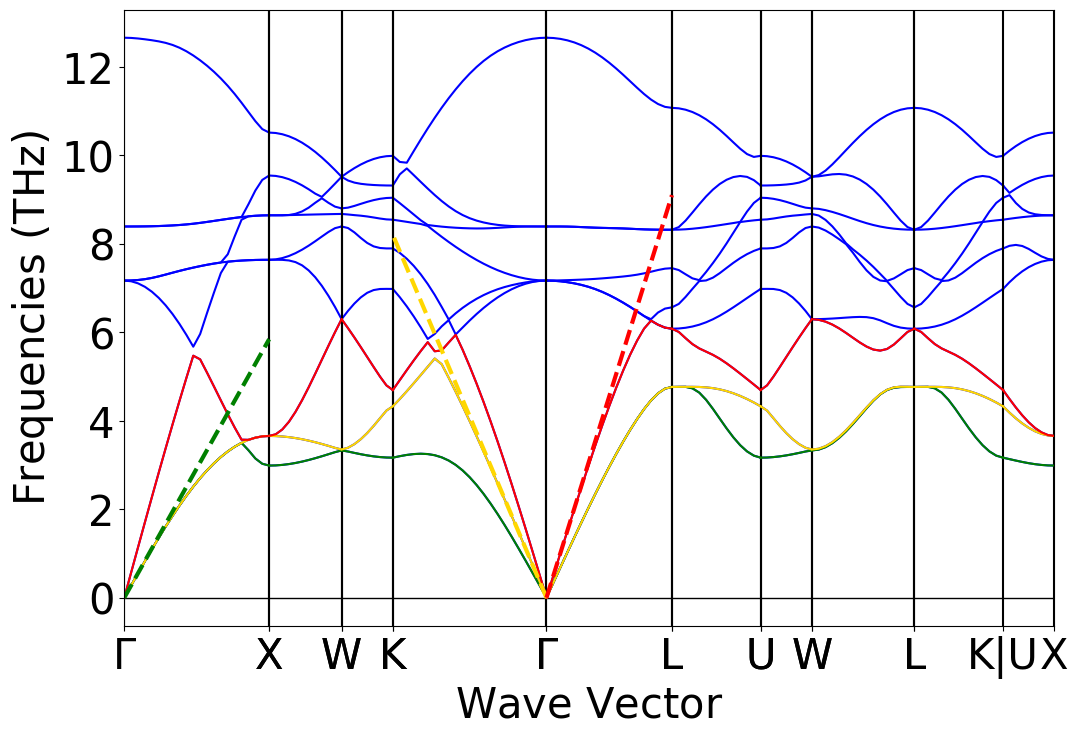

In [8]:
ph_bandstructure.get_plot()
for i in range(len(distances)):
    plt.plot(distances[i], frequency[i][0], color = 'green')
    plt.plot(distances[i], frequency[i][1], color = 'gold')
    plt.plot(distances[i], frequency[i][2], color = 'red')

# pour la bande verte dans la direction Gamma - X 
plt.plot([distances[0][0], distances[0][-1]], 
         [0,v_verte/(2*np.pi*toHz*A)*(distances[0][-1]-distances[0][0])], 
         '--', color="green",lw=3)

# pour la bande jaune dans la direction K - Gamma
plt.plot([distances[3][-1], distances[3][0]], 
         [0,v_jaune/(2*np.pi*toHz*A)*(distances[3][-1]-distances[3][0])], 
         '--', color="gold",lw=3)

# pour la bande rouge dans la direction Gamma - L
plt.plot([distances[4][0], distances[4][-1]], 
         [0,v_rouge/(2*np.pi*toHz*A)*(distances[4][-1]-distances[4][0])], 
         '--', color="red",lw=3)

plt.show()